<a href="https://colab.research.google.com/github/debvasconcellos/projeto003-riscorelativo/blob/main/Projeto03_RiscoRelativo_SuperCaja.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Projeto: Risco Relativo - Banco Super Cajá (Laboratoria - Débora Vasconcellos)


## Data Frame - Estatísticas Gerais

In [ ]:
#Importando pandas e carregando o Data Frame
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/Laboratoria - Projeto 3/users_loans_score.csv')
df


,user_id,age,sex,number_last_month_salary_corrigido,number_dependents_corrigido,default_flag,using_lines_not_secured_personal_assets,more_90_days_overdue,debt_ratio,total_loans,...,other_loans,has_delay,has_dependents,has_more_90_days_overdue,age_risk,salary_risk,total_loans_risk,lines_not_secured_risk,debt_ratio_risk,score_default
0,13184,55,F,5400,0,0,0.000000,0,0.000000,1,...,1,0,0,0,0,0,1,0,0,1
1,35341,50,F,5400,0,0,0.000000,0,93.000000,1,...,1,0,0,0,0,0,1,0,0,1
2,35781,54,F,8082,0,0,0.149323,0,0.014475,1,...,1,0,0,0,0,0,1,0,0,1
3,22846,59,F,6000,0,0,0.017628,0,0.001166,1,...,1,0,0,0,0,0,1,0,0,1
4,11309,63,M,13500,1,0,0.060397,0,0.002666,1,...,1,0,1,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35570,20859,41,F,9712,4,0,0.115942,0,0.495624,49,...,47,0,1,0,1,0,0,0,1,1
35571,13056,58,F,17280,0,0,0.551663,0,0.816909,50,...,44,0,0,0,0,0,0,0,1,0
35572,23499,71,F,10500,0,0,0.018052,0,0.030283,52,...,52,0,0,0,0,0,0,0,0,0
35573,3631,67,M,20750,3,0,0.911758,0,0.865500,53,...,48,0,1,0,0,0,0,1,1,1


In [ ]:
#Estatísticas Gerais das variáveis numéricas
print(df.describe())


            user_id           age  number_last_month_salary_corrigido  \
count  35575.000000  35575.000000                        3.557500e+04   
mean   18005.569895     52.534223                        6.447037e+03   
std    10393.562002     14.738055                        1.166701e+04   
min        1.000000     21.000000                        0.000000e+00   
25%     9007.500000     42.000000                        3.945500e+03   
50%    18002.000000     52.000000                        5.400000e+03   
75%    27005.500000     63.000000                        7.494500e+03   
max    35999.000000    109.000000                        1.560100e+06   

       number_dependents_corrigido  default_flag  \
count                 35575.000000  35575.000000   
mean                      0.741391      0.017484   
std                       1.112101      0.131069   
min                       0.000000      0.000000   
25%                       0.000000      0.000000   
50%                       0.00

## Matriz de Confusão e Consultando Score


### Matriz de Confusão com todos os Dados


True Positive: 518
False Positive: 6204
False Negative: 104
True Negative: 28749
Accuracy: 0.82268446943078
Precision: 0.07706039869086581
Recall: 0.8327974276527331
F1 Score: 0.14106753812636166


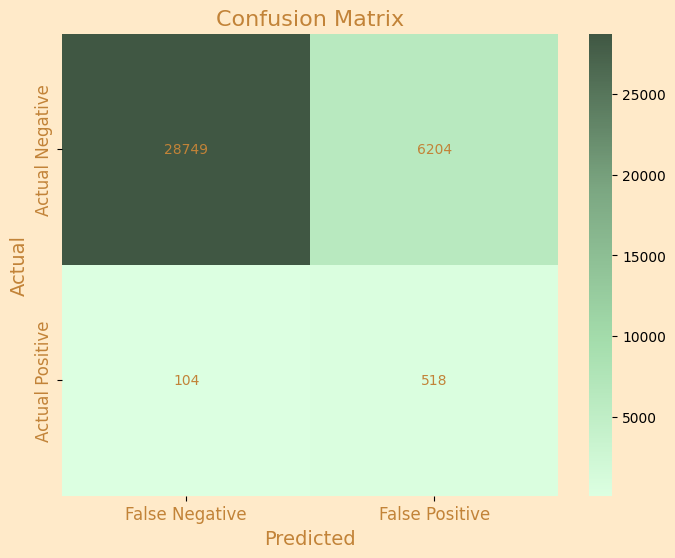

In [ ]:
#Matriz de Confusão e Consultando Score
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap

# Carregar os dados do DataFrame
df = pd.read_csv('/content/drive/MyDrive/Laboratoria - Projeto 3/users_loans_score.csv')

# Calcular o score_consult
df['score_consult'] = df['age_risk'] + df['salary_risk'] + df['total_loans_risk'] + df['lines_not_secured_risk'] + df['has_more_90_days_overdue']

# Criar a flag de risco
df['score_flag'] = np.where(df['score_consult'] > 2, 1, 0)

# Filtrar compliant e defaulters
compliants = df[df['default_flag'] == 0]
defaulters = df[df['default_flag'] == 1]

# Usar todos os dados, sem amostragem
selected_data = df.copy()

# Calculando a matriz de confusão
y_true = selected_data['default_flag']
y_pred = selected_data['score_flag']

cm = confusion_matrix(y_true, y_pred)
tn, fp, fn, tp = cm.ravel()

# Calcular as métricas de desempenho
accuracy = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred)
recall = recall_score(y_true, y_pred)
f1 = f1_score(y_true, y_pred)

print(f'True Positive: {tp}')
print(f'False Positive: {fp}')
print(f'False Negative: {fn}')
print(f'True Negative: {tn}')
print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')

# Definindo o colormap personalizado
colors = ["#dcffe1", "#a4ddac", "#7ba681", "#405743"]  # Do claro para o verde mais intenso
cmap = LinearSegmentedColormap.from_list("custom_green", colors)

# Personalizando o gráfico
plt.figure(figsize=(8,6))
ax = sns.heatmap(cm, annot=True, fmt='d', cmap=cmap, cbar=True, annot_kws={"color": "#c28338"})
plt.xlabel('Predicted', fontsize=14, color="#c28338")
plt.ylabel('Actual', fontsize=14, color="#c28338")
plt.title('Confusion Matrix', fontsize=16, color="#c28338")
plt.xticks(ticks=[0.5, 1.5], labels=['False Negative', 'False Positive'], fontsize=12, color="#c28338")
plt.yticks(ticks=[0.5, 1.5], labels=['Actual Negative', 'Actual Positive'], fontsize=12, color="#c28338")

# Alterando a cor de fundo
ax.set_facecolor("#FFEAC9")
plt.gcf().set_facecolor("#FFEAC9")

# Exibindo o gráfico
plt.show()

### Matriz de Confusão e Consultando Score com Amostra de 10% (Undersampling)

True Positive: 518
False Positive: 650
False Negative: 104
True Negative: 2845
Accuracy: 0.816856934661161
Precision: 0.4434931506849315
Recall: 0.8327974276527331
F1 Score: 0.5787709497206703


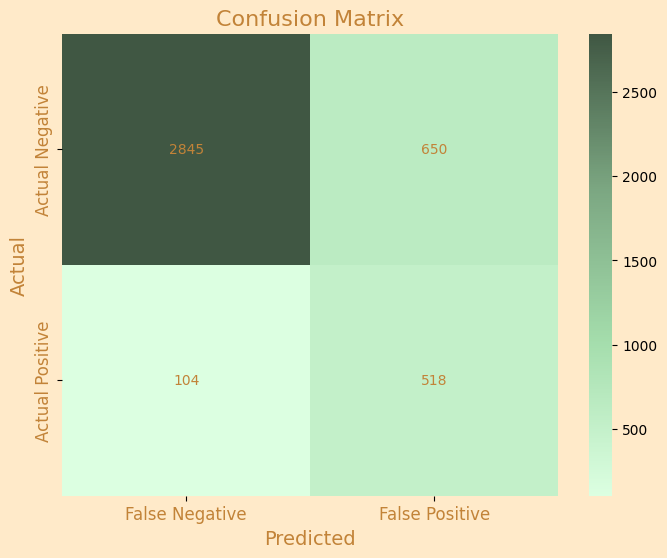

In [ ]:
#Matriz de Confusão e Consultando Score (Undersampling)
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import seaborn as sns
import matplotlib.pyplot as plt

# Carregar os dados no DataFrame (ajuste o caminho conforme necessário)
df = pd.read_csv('/content/drive/MyDrive/Laboratoria - Projeto 3/users_loans_score.csv')

# Calcular o score_consult
df['score_consult'] = df['age_risk'] + df['salary_risk'] + df['total_loans_risk'] + df['lines_not_secured_risk'] + df['has_more_90_days_overdue']

# Criar a flag de risco
df['score_flag'] = np.where(df['score_consult'] > 2, 1, 0)

# Filtrar compliant e defaulters
compliants = df[df['default_flag'] == 0]
defaulters = df[df['default_flag'] == 1]

# Amostra de 10% compliant
sample_compliants = compliants.sample(frac=0.10, random_state=1)

# Concatenando a amostra de compliant com defaulters
selected_data = pd.concat([sample_compliants, defaulters])

# Calculando a matriz de confusão
y_true = selected_data['default_flag']
y_pred = selected_data['score_flag']

cm = confusion_matrix(y_true, y_pred)
tn, fp, fn, tp = cm.ravel()

# Calcular as métricas de desempenho
accuracy = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred)
recall = recall_score(y_true, y_pred)
f1 = f1_score(y_true, y_pred)

print(f'True Positive: {tp}')
print(f'False Positive: {fp}')
print(f'False Negative: {fn}')
print(f'True Negative: {tn}')
print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')

# Definindo o colormap personalizado
colors = ["#dcffe1", "#a4ddac", "#7ba681", "#405743"]  # Do claro para o verde mais intenso
cmap = LinearSegmentedColormap.from_list("custom_green", colors)

# Personalizando o gráfico
plt.figure(figsize=(8,6))
ax = sns.heatmap(cm, annot=True, fmt='d', cmap=cmap, cbar=True, annot_kws={"color": "#c28338"})
plt.xlabel('Predicted', fontsize=14, color="#c28338")
plt.ylabel('Actual', fontsize=14, color="#c28338")
plt.title('Confusion Matrix', fontsize=16, color="#c28338")
plt.xticks(ticks=[0.5, 1.5], labels=['False Negative', 'False Positive'], fontsize=12, color="#c28338")
plt.yticks(ticks=[0.5, 1.5], labels=['Actual Negative', 'Actual Positive'], fontsize=12, color="#c28338")

# Alterando a cor de fundo
ax.set_facecolor("#FFEAC9")
plt.gcf().set_facecolor("#FFEAC9")

# Exibindo o gráfico
plt.show()

## Regressão Logística - Modelo de Identificação de Clientes de Risco


### Primeira Tentativa (6 variáveis independentes)

Verdadeiros Positivos (TP): 47
Falsos Positivos (FP): 29
Falsos Negativos (FN): 166
Verdadeiros Negativos (TN): 10431
Acurácia: 0.9817
Precisão: 0.6184
Recall: 0.2207
F1 Score: 0.3253
Roc auc : 0.6089
Log Loss: 0.6585


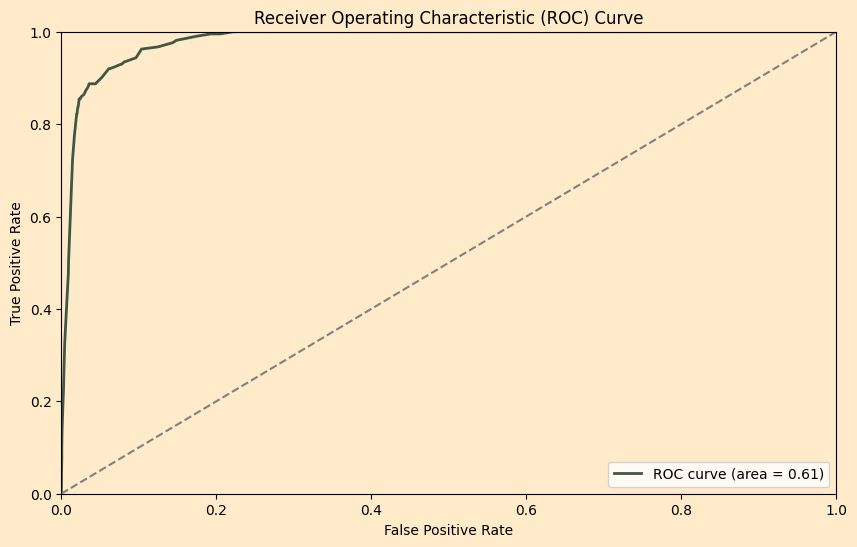

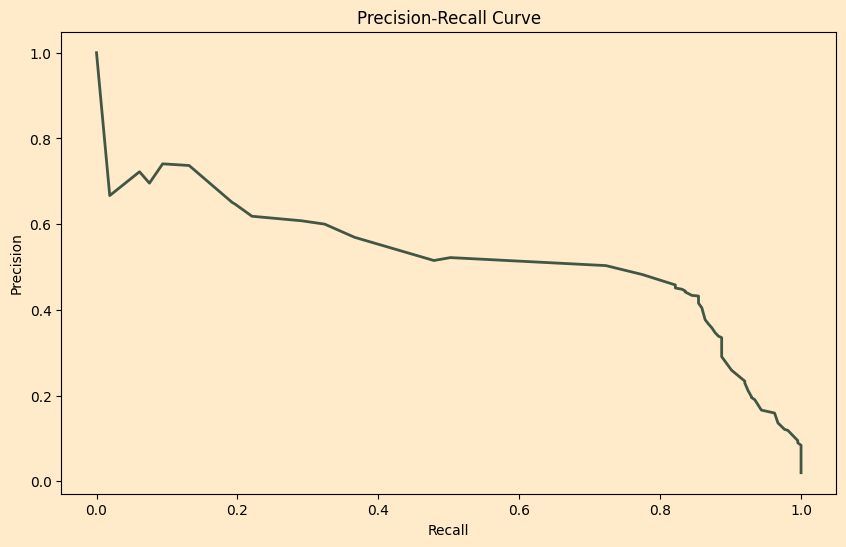

In [8]:
#Primeira Tentativa (Usando 6 variáveis)
#Importando bibliotecas
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_curve, roc_auc_score, precision_recall_curve, log_loss
import matplotlib.pyplot as plt
import seaborn as sns

#Dados
df = pd.read_csv('/content/drive/MyDrive/Laboratoria - Projeto 3/users_loans_score.csv')

#Dividir os dados entre treinamento e teste
# Variáveis independentes (features)
X = df[['age_risk', 'salary_risk', 'total_loans_risk', 'lines_not_secured_risk', 'debt_ratio_risk', 'has_more_90_days_overdue']]

# Variável dependente (target)
y = df['default_flag']

# Dividir os dados em conjuntos de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Criar o modelo de regressão logística
model = LogisticRegression()

# Treinar o modelo
model.fit(X_train, y_train)

# Prever os valores para o conjunto de teste
y_prob = model.predict_proba(X_test)[:, 1]
y_pred = model.predict(X_test)

# Calcular a curva ROC e a área sob a curva (AUC)
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = roc_auc_score(y_test, y_prob)

# Calcular a matriz de confusão
conf_matrix = confusion_matrix(y_test, y_pred)
true_positive = conf_matrix[1, 1]
false_positive = conf_matrix[0, 1]
false_negative = conf_matrix[1, 0]
true_negative = conf_matrix[0, 0]

# Calcular as métricas de desempenho
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)
log_loss = log_loss(y_test, y_pred)

# Exibir os resultados
print(f'Verdadeiros Positivos (TP): {true_positive}')
print(f'Falsos Positivos (FP): {false_positive}')
print(f'Falsos Negativos (FN): {false_negative}')
print(f'Verdadeiros Negativos (TN): {true_negative}')
print(f'Acurácia: {accuracy:.4f}')
print(f'Precisão: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')
print(f'Roc auc : {roc_auc:.4f}')
print(f'Log Loss: {log_loss:.4f}')

# Plotar a curva ROC
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='#405743', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")

# Alterar a cor de fundo
ax = plt.gca()
ax.set_facecolor("#FFEAC9")
plt.gcf().set_facecolor("#FFEAC9")

plt.show()


# Calcular a curva de precisão-recall
precision, recall, _ = precision_recall_curve(y_test, y_prob)

# Plotar a curva de precisão-recall
plt.figure(figsize=(10, 6))
plt.plot(recall, precision, color='#405743', lw=2)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')

# Alterar a cor de fundo
ax = plt.gca()
ax.set_facecolor("#FFEAC9")
plt.gcf().set_facecolor("#FFEAC9")

plt.show()

### Segunda Tentativa (agora sem a variável debt_ratio)


Verdadeiros Positivos (TP): 35
Falsos Positivos (FP): 22
Falsos Negativos (FN): 178
Verdadeiros Negativos (TN): 10438
Acurácia: 0.9813
Precisão: 0.6140
Recall: 0.1643
F1 Score: 0.2593
Roc auc : 0.5811
Log Loss: 0.6754


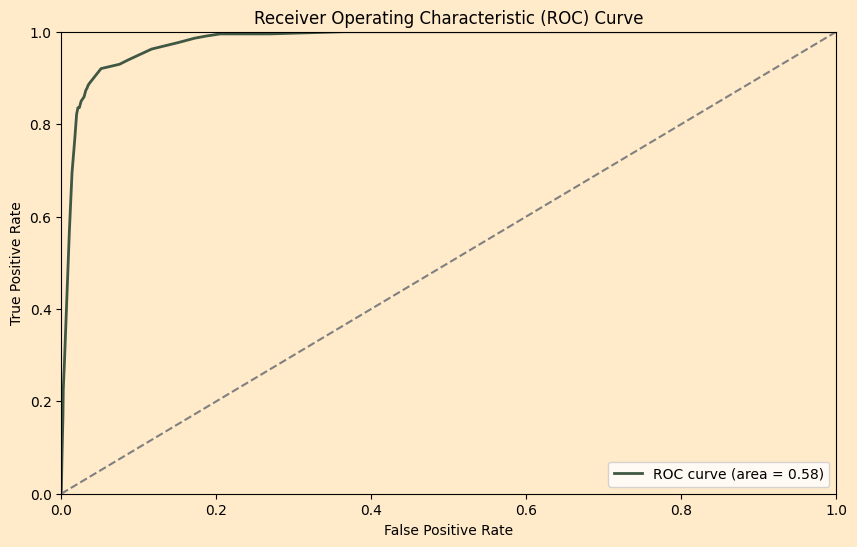

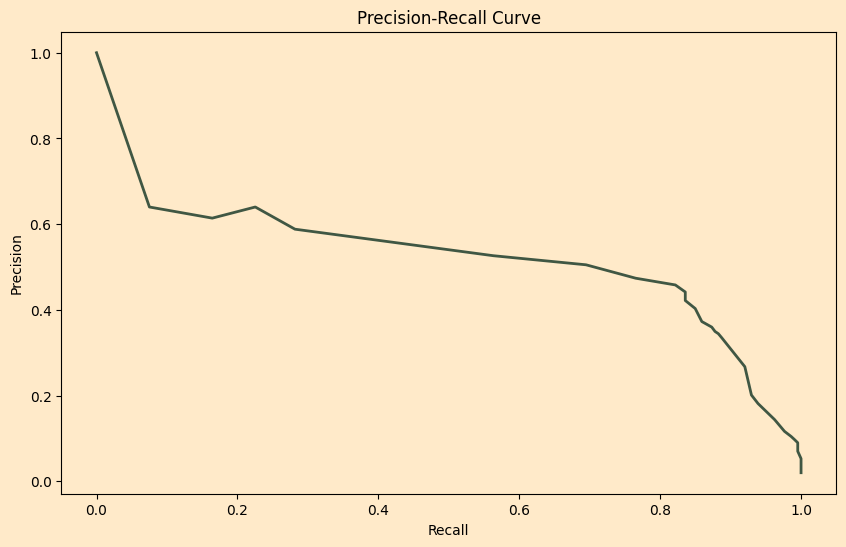

In [9]:
#Segunda Tentativa sem a variável debt_ratio
#Importando bibliotecas
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_curve, roc_auc_score, precision_recall_curve, log_loss
import matplotlib.pyplot as plt
import seaborn as sns

#Dados
df = pd.read_csv('/content/drive/MyDrive/Laboratoria - Projeto 3/users_loans_score.csv')

# Variáveis independentes (features)
X = df[['age_risk', 'salary_risk', 'total_loans_risk', 'lines_not_secured_risk', 'has_more_90_days_overdue']]

# Variável dependente (target)
y = df['default_flag']

# Dividir os dados em conjuntos de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Criar o modelo de regressão logística
model = LogisticRegression()

# Treinar o modelo
model.fit(X_train, y_train)

# Prever os valores para o conjunto de teste
y_prob = model.predict_proba(X_test)[:, 1]
y_pred = model.predict(X_test)

# Calcular a curva ROC e a área sob a curva (AUC)
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = roc_auc_score(y_test, y_prob)

# Calcular a matriz de confusão
conf_matrix = confusion_matrix(y_test, y_pred)
true_positive = conf_matrix[1, 1]
false_positive = conf_matrix[0, 1]
false_negative = conf_matrix[1, 0]
true_negative = conf_matrix[0, 0]

# Calcular as métricas de desempenho
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)
log_loss = log_loss(y_test, y_pred)

# Exibir os resultados
print(f'Verdadeiros Positivos (TP): {true_positive}')
print(f'Falsos Positivos (FP): {false_positive}')
print(f'Falsos Negativos (FN): {false_negative}')
print(f'Verdadeiros Negativos (TN): {true_negative}')
print(f'Acurácia: {accuracy:.4f}')
print(f'Precisão: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')
print(f'Roc auc : {roc_auc:.4f}')
print(f'Log Loss: {log_loss:.4f}')

# Plotar a curva ROC
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='#405743', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")

# Alterar a cor de fundo
ax = plt.gca()
ax.set_facecolor("#FFEAC9")
plt.gcf().set_facecolor("#FFEAC9")

plt.show()


# Calcular a curva de precisão-recall
precision, recall, _ = precision_recall_curve(y_test, y_prob)

# Plotar a curva de precisão-recall
plt.figure(figsize=(10, 6))
plt.plot(recall, precision, color='#405743', lw=2)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')

# Alterar a cor de fundo
ax = plt.gca()
ax.set_facecolor("#FFEAC9")
plt.gcf().set_facecolor("#FFEAC9")

plt.show()



### Terceira tentativa (usando a variável score_default)


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Verdadeiros Positivos (TP): 0
Falsos Positivos (FP): 0
Falsos Negativos (FN): 213
Verdadeiros Negativos (TN): 10460
Acurácia: 0.9800
Precisão: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Roc auc : 0.5000
Log Loss: 0.7193


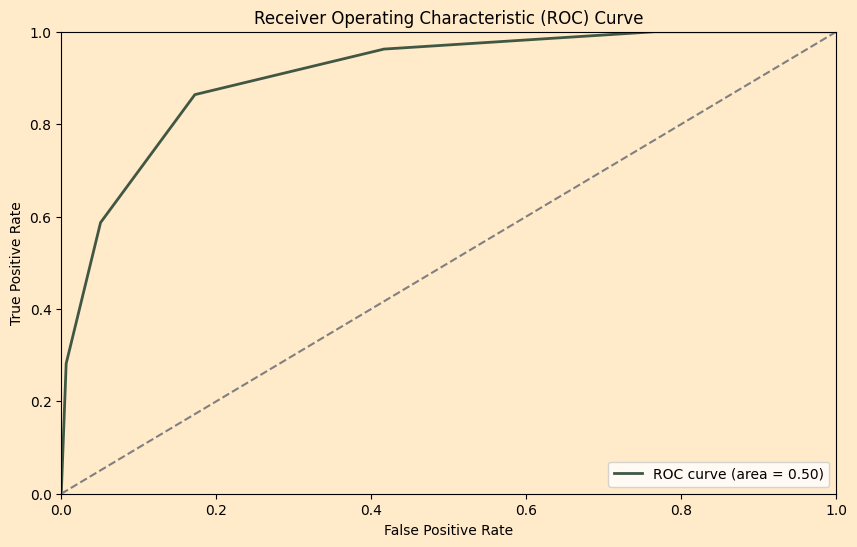

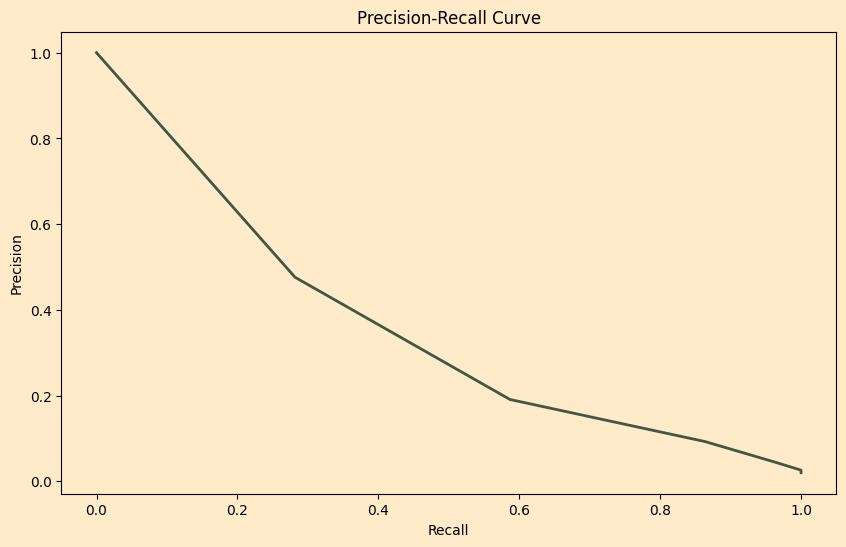

In [10]:
#Primeira Tentativa score_default
#Importando bibliotecas
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_curve, roc_auc_score, precision_recall_curve, log_loss
import matplotlib.pyplot as plt
import seaborn as sns

#Dados
df = pd.read_csv('/content/drive/MyDrive/Laboratoria - Projeto 3/users_loans_score.csv')

# Variáveis independentes (features)
X = df[['score_default']]

# Variável dependente (target)
y = df['default_flag']

# Dividir os dados em conjuntos de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Criar o modelo de regressão logística
model = LogisticRegression()

# Treinar o modelo
model.fit(X_train, y_train)

# Prever os valores para o conjunto de teste
y_prob = model.predict_proba(X_test)[:, 1]
y_pred = model.predict(X_test)

# Calcular a curva ROC e a área sob a curva (AUC)
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = roc_auc_score(y_test, y_prob)

# Calcular a matriz de confusão
conf_matrix = confusion_matrix(y_test, y_pred)
true_positive = conf_matrix[1, 1]
false_positive = conf_matrix[0, 1]
false_negative = conf_matrix[1, 0]
true_negative = conf_matrix[0, 0]

# Calcular as métricas de desempenho
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)
log_loss = log_loss(y_test, y_pred)

# Exibir os resultados
print(f'Verdadeiros Positivos (TP): {true_positive}')
print(f'Falsos Positivos (FP): {false_positive}')
print(f'Falsos Negativos (FN): {false_negative}')
print(f'Verdadeiros Negativos (TN): {true_negative}')
print(f'Acurácia: {accuracy:.4f}')
print(f'Precisão: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')
print(f'Roc auc : {roc_auc:.4f}')
print(f'Log Loss: {log_loss:.4f}')

# Plotar a curva ROC
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='#405743', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")

# Alterar a cor de fundo
ax = plt.gca()
ax.set_facecolor("#FFEAC9")
plt.gcf().set_facecolor("#FFEAC9")

plt.show()


# Calcular a curva de precisão-recall
precision, recall, _ = precision_recall_curve(y_test, y_prob)

# Plotar a curva de precisão-recall
plt.figure(figsize=(10, 6))
plt.plot(recall, precision, color='#405743', lw=2)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')

# Alterar a cor de fundo
ax = plt.gca()
ax.set_facecolor("#FFEAC9")
plt.gcf().set_facecolor("#FFEAC9")

plt.show()

### MODELO ESCOLHIDO - Quarta Tentativa (agora utilizando a técnica SMOTE para balanceamento no grupo treino com 5 variáveis independentes)

Verdadeiros Positivos (TP): 189
Falsos Positivos (FP): 375
Falsos Negativos (FN): 24
Verdadeiros Negativos (TN): 10085
Acurácia: 0.9626
Precisão: 0.3351
Recall: 0.8873
F1 Score: 0.4865
Roc AUC: 0.9801
Log Loss: 0.1757


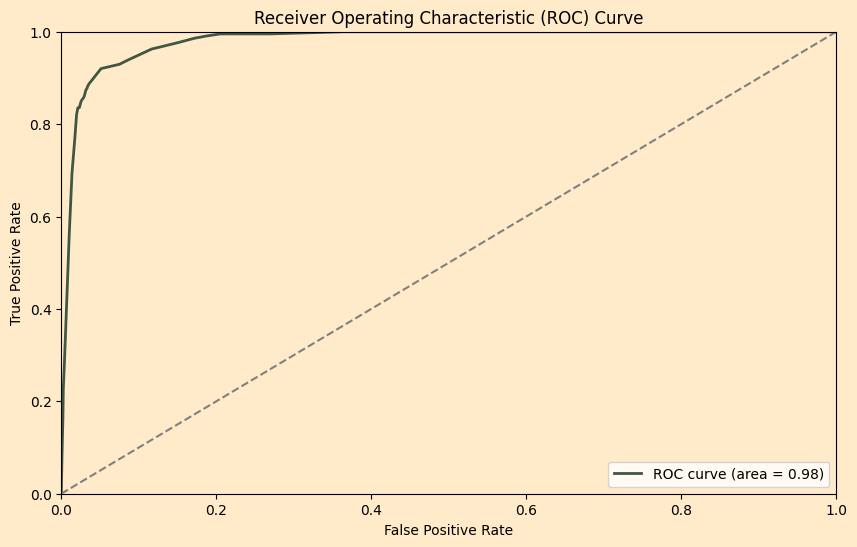

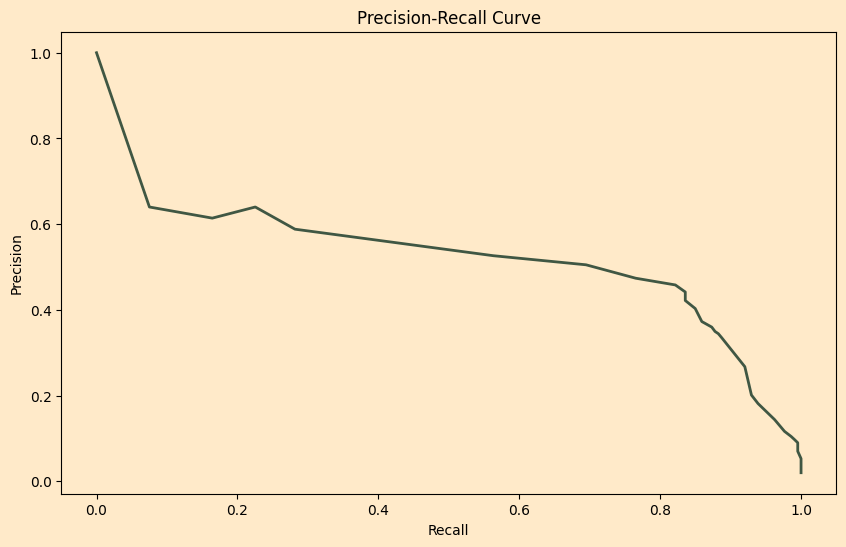

In [11]:
#Primeira Tentativa de Balanceamento usando a técnica SMOTE no grupo treino
# Importando bibliotecas
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_curve, roc_auc_score, precision_recall_curve, log_loss
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE

# Dados
df = pd.read_csv('/content/drive/MyDrive/Laboratoria - Projeto 3/users_loans_score.csv')

# Dividir os dados entre treinamento e teste
# Variáveis independentes (features)
X = df[['age_risk', 'salary_risk', 'total_loans_risk', 'lines_not_secured_risk', 'has_more_90_days_overdue']]

# Variável dependente (target)
y = df['default_flag']

# Dividir os dados em conjuntos de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Aplicar SMOTE ao conjunto de treinamento
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Criar o modelo de regressão logística
model = LogisticRegression()

# Treinar o modelo com os dados resampleados
model.fit(X_train_resampled, y_train_resampled)

# Prever os valores para o conjunto de teste
y_prob = model.predict_proba(X_test)[:, 1]
y_pred = model.predict(X_test)

# Calcular a curva ROC e a área sob a curva (AUC)
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = roc_auc_score(y_test, y_prob)

# Calcular a matriz de confusão
conf_matrix = confusion_matrix(y_test, y_pred)
true_positive = conf_matrix[1, 1]
false_positive = conf_matrix[0, 1]
false_negative = conf_matrix[1, 0]
true_negative = conf_matrix[0, 0]

# Calcular as métricas de desempenho
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_prob)
log_loss_value = log_loss(y_test, y_prob)

# Exibir os resultados
print(f'Verdadeiros Positivos (TP): {true_positive}')
print(f'Falsos Positivos (FP): {false_positive}')
print(f'Falsos Negativos (FN): {false_negative}')
print(f'Verdadeiros Negativos (TN): {true_negative}')
print(f'Acurácia: {accuracy:.4f}')
print(f'Precisão: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')
print(f'Roc AUC: {roc_auc:.4f}')
print(f'Log Loss: {log_loss_value:.4f}')

# Plotar a curva ROC
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='#405743', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")

# Alterar a cor de fundo
ax = plt.gca()
ax.set_facecolor("#FFEAC9")
plt.gcf().set_facecolor("#FFEAC9")

plt.show()


# Calcular a curva de precisão-recall
precision, recall, _ = precision_recall_curve(y_test, y_prob)

# Plotar a curva de precisão-recall
plt.figure(figsize=(10, 6))
plt.plot(recall, precision, color='#405743', lw=2)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')

# Alterar a cor de fundo
ax = plt.gca()
ax.set_facecolor("#FFEAC9")
plt.gcf().set_facecolor("#FFEAC9")

plt.show()


### Quinta Tentativa (usando a técnica SMOTE de balanceamento e a variável score_default como independente)

Verdadeiros Positivos (TP): 184
Falsos Positivos (FP): 1803
Falsos Negativos (FN): 29
Verdadeiros Negativos (TN): 8657
Acurácia: 0.8284
Precisão: 0.0926
Recall: 0.8638
F1 Score: 0.1673
Roc AUC: 0.9083
Log Loss: 0.4074


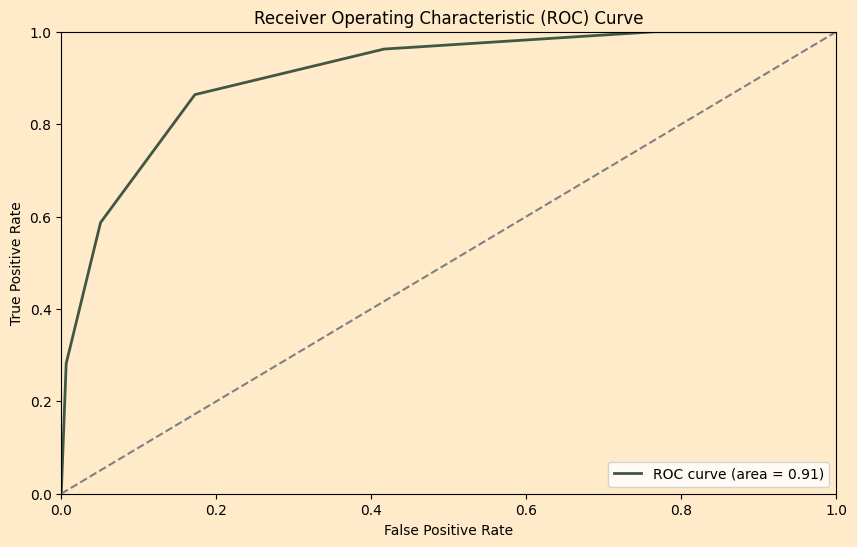

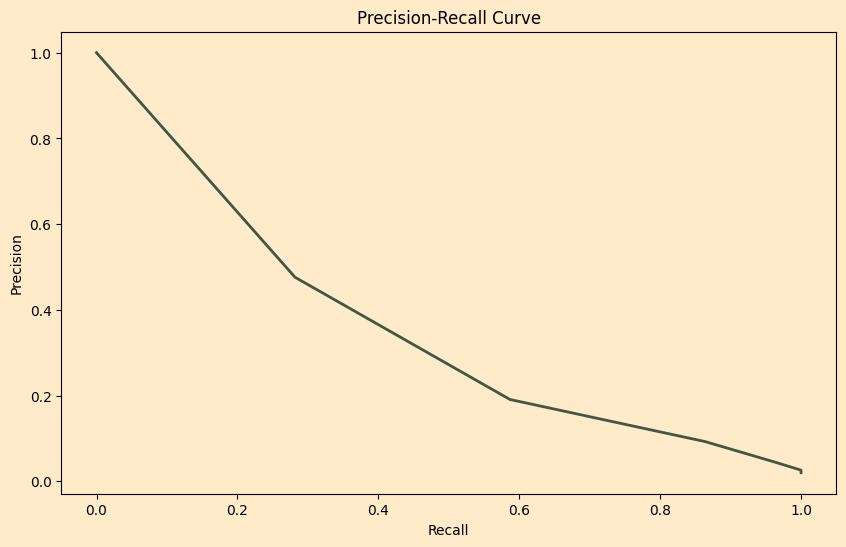

In [7]:
#Primeira Tentativa de Balanceamento com score_default usando a técnica SMOTE no grupo treino
# Importando bibliotecas
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_curve, roc_auc_score, precision_recall_curve, log_loss
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE

# Dados
df = pd.read_csv('/content/drive/MyDrive/Laboratoria - Projeto 3/users_loans_score.csv')


# Variáveis independentes (features)
X = df[['score_default']]

# Variável dependente (target)
y = df['default_flag']

# Dividir os dados em conjuntos de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Aplicar SMOTE ao conjunto de treinamento
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Criar o modelo de regressão logística
model = LogisticRegression()

# Treinar o modelo com os dados resampleados
model.fit(X_train_resampled, y_train_resampled)

# Prever os valores para o conjunto de teste
y_prob = model.predict_proba(X_test)[:, 1]
y_pred = model.predict(X_test)

# Calcular a curva ROC e a área sob a curva (AUC)
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = roc_auc_score(y_test, y_prob)

# Calcular a matriz de confusão
conf_matrix = confusion_matrix(y_test, y_pred)
true_positive = conf_matrix[1, 1]
false_positive = conf_matrix[0, 1]
false_negative = conf_matrix[1, 0]
true_negative = conf_matrix[0, 0]

# Calcular as métricas de desempenho
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_prob)
log_loss_value = log_loss(y_test, y_prob)

# Exibir os resultados
print(f'Verdadeiros Positivos (TP): {true_positive}')
print(f'Falsos Positivos (FP): {false_positive}')
print(f'Falsos Negativos (FN): {false_negative}')
print(f'Verdadeiros Negativos (TN): {true_negative}')
print(f'Acurácia: {accuracy:.4f}')
print(f'Precisão: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')
print(f'Roc AUC: {roc_auc:.4f}')
print(f'Log Loss: {log_loss_value:.4f}')



# Plotar a curva ROC
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='#405743', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")

# Alterar a cor de fundo
ax = plt.gca()
ax.set_facecolor("#FFEAC9")
plt.gcf().set_facecolor("#FFEAC9")

plt.show()


# Calcular a curva de precisão-recall
precision, recall, _ = precision_recall_curve(y_test, y_prob)

# Plotar a curva de precisão-recall
plt.figure(figsize=(10, 6))
plt.plot(recall, precision, color='#405743', lw=2)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')

# Alterar a cor de fundo
ax = plt.gca()
ax.set_facecolor("#FFEAC9")
plt.gcf().set_facecolor("#FFEAC9")

plt.show()



### Sexta Tentativa (testando a variável score_default com SMOTE e RANDOM FOREST)

Verdadeiros Positivos (RF): 184
Falsos Positivos (RF): 1803
Falsos Negativos (RF): 29
Verdadeiros Negativos (RF): 8657
Acurácia (RF): 0.8284
Precisão (RF): 0.0926
Recall (RF): 0.8638
F1 Score (RF): 0.1673
Roc AUC (RF): 0.9083
Log Loss (RF): 0.4071


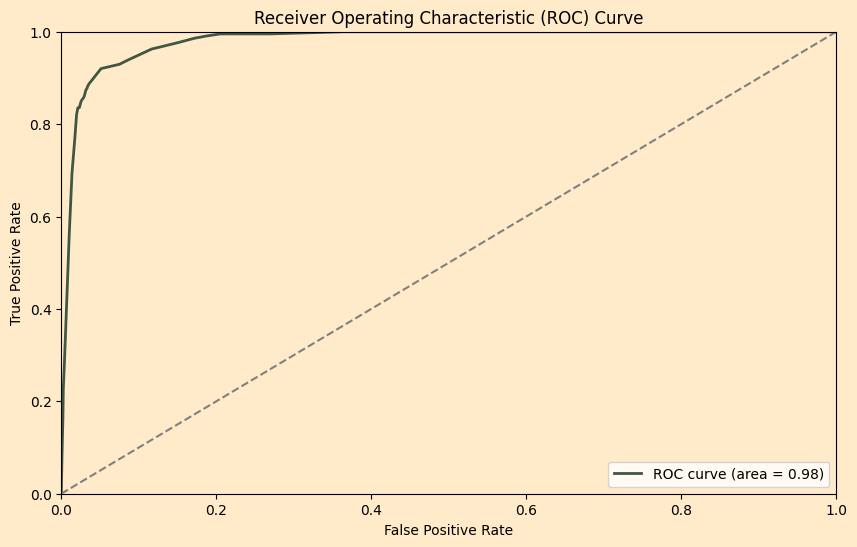

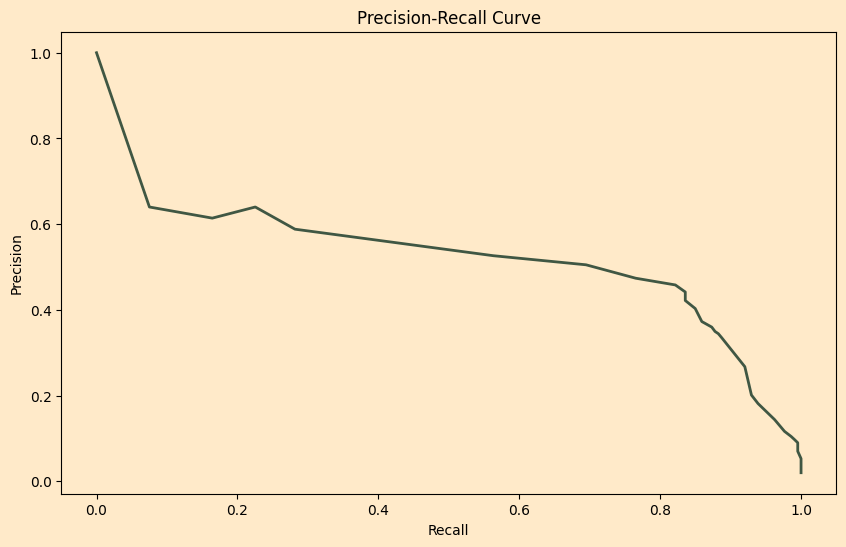

In [12]:
#Testando score_default com SMOTE e RANDOM FOREST
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_curve, roc_auc_score, precision_recall_curve, log_loss
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE

# Dados
df = pd.read_csv('/content/drive/MyDrive/Laboratoria - Projeto 3/users_loans_score.csv')


# Variáveis independentes (features)
X = df[['score_default']]

# Variável dependente (target)
y = df['default_flag']

# Dividir os dados em conjuntos de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Aplicar SMOTE ao conjunto de treinamento
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Criar o modelo de Random Forest
model_rf = RandomForestClassifier(random_state=42)

# Treinar o modelo com os dados resampleados
model_rf.fit(X_train_resampled, y_train_resampled)

# Prever os valores para o conjunto de teste
y_prob_rf = model_rf.predict_proba(X_test)[:, 1]
y_pred_rf = model_rf.predict(X_test)

# Calcular a matriz de confusão
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
true_positive_rf = conf_matrix_rf[1, 1]
false_positive_rf = conf_matrix_rf[0, 1]
false_negative_rf = conf_matrix_rf[1, 0]
true_negative_rf = conf_matrix_rf[0, 0]

# Calcular as métricas de desempenho
accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf)
recall_rf = recall_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf)
roc_auc_rf = roc_auc_score(y_test, y_prob_rf)
log_loss_rf = log_loss(y_test, y_prob_rf)

# Exibir os resultados
print(f'Verdadeiros Positivos (RF): {true_positive_rf}')
print(f'Falsos Positivos (RF): {false_positive_rf}')
print(f'Falsos Negativos (RF): {false_negative_rf}')
print(f'Verdadeiros Negativos (RF): {true_negative_rf}')
print(f'Acurácia (RF): {accuracy_rf:.4f}')
print(f'Precisão (RF): {precision_rf:.4f}')
print(f'Recall (RF): {recall_rf:.4f}')
print(f'F1 Score (RF): {f1_rf:.4f}')
print(f'Roc AUC (RF): {roc_auc_rf:.4f}')
print(f'Log Loss (RF): {log_loss_rf:.4f}')

# Plotar a curva ROC
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='#405743', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")

# Alterar a cor de fundo
ax = plt.gca()
ax.set_facecolor("#FFEAC9")
plt.gcf().set_facecolor("#FFEAC9")

plt.show()


# Calcular a curva de precisão-recall
precision, recall, _ = precision_recall_curve(y_test, y_prob)

# Plotar a curva de precisão-recall
plt.figure(figsize=(10, 6))
plt.plot(recall, precision, color='#405743', lw=2)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')

# Alterar a cor de fundo
ax = plt.gca()
ax.set_facecolor("#FFEAC9")
plt.gcf().set_facecolor("#FFEAC9")

plt.show()

### Sétima Tentativa (testando o modelo com vários ajustes de limiar e 6 variáveis)

In [ ]:
#Testando o modelo com variós ajustes de limiar (com debt_ratio)
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_curve, roc_auc_score, precision_recall_curve, log_loss
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE

# Dados
df = pd.read_csv('/content/drive/MyDrive/Laboratoria - Projeto 3/users_loans_score.csv')


# Variáveis independentes (features)
X = df[['age_risk', 'salary_risk', 'total_loans_risk', 'lines_not_secured_risk', 'debt_ratio_risk', 'has_more_90_days_overdue']]

# Variável dependente (target)
y = df['default_flag']

# Dividir os dados em conjuntos de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Aplicar SMOTE ao conjunto de treinamento
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Criar e treinar o modelo de regressão logística
model = LogisticRegression()
model.fit(X_train_resampled, y_train_resampled)

# Prever as probabilidades para o conjunto de teste
y_prob = model.predict_proba(X_test)[:, 1]

# Função para calcular e imprimir métricas para um dado limiar
def evaluate_threshold(y_test, y_prob, threshold):
    y_pred = (y_prob >= threshold).astype(int)
    conf_matrix = confusion_matrix(y_test, y_pred)
    true_positive = conf_matrix[1, 1]
    false_positive = conf_matrix[0, 1]
    false_negative = conf_matrix[1, 0]
    true_negative = conf_matrix[0, 0]

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_prob)
    log_loss_value = log_loss(y_test, y_prob)

    print(f'Limiar: {threshold}')
    print(f'Verdadeiros Positivos (TP): {true_positive}')
    print(f'Falsos Positivos (FP): {false_positive}')
    print(f'Falsos Negativos (FN): {false_negative}')
    print(f'Verdadeiros Negativos (TN): {true_negative}')
    print(f'Acurácia: {accuracy:.4f}')
    print(f'Precisão: {precision:.4f}')
    print(f'Recall: {recall:.4f}')
    print(f'F1 Score: {f1:.4f}')
    print(f'Roc AUC: {roc_auc:.4f}')
    print(f'Log Loss: {log_loss_value:.4f}')
    print('')

# Avaliar o modelo com diferentes limiares
for threshold in [0.3, 0.4, 0.5, 0.6, 0.7]:
    evaluate_threshold(y_test, y_prob, threshold)



Limiar: 0.3
Verdadeiros Positivos (TP): 197
Falsos Positivos (FP): 719
Falsos Negativos (FN): 16
Verdadeiros Negativos (TN): 9741
Acurácia: 0.9311
Precisão: 0.2151
Recall: 0.9249
F1 Score: 0.3490
Roc AUC: 0.9808
Log Loss: 0.1716

Limiar: 0.4
Verdadeiros Positivos (TP): 197
Falsos Positivos (FP): 719
Falsos Negativos (FN): 16
Verdadeiros Negativos (TN): 9741
Acurácia: 0.9311
Precisão: 0.2151
Recall: 0.9249
F1 Score: 0.3490
Roc AUC: 0.9808
Log Loss: 0.1716

Limiar: 0.5
Verdadeiros Positivos (TP): 189
Falsos Positivos (FP): 461
Falsos Negativos (FN): 24
Verdadeiros Negativos (TN): 9999
Acurácia: 0.9546
Precisão: 0.2908
Recall: 0.8873
F1 Score: 0.4380
Roc AUC: 0.9808
Log Loss: 0.1716

Limiar: 0.6
Verdadeiros Positivos (TP): 189
Falsos Positivos (FP): 375
Falsos Negativos (FN): 24
Verdadeiros Negativos (TN): 10085
Acurácia: 0.9626
Precisão: 0.3351
Recall: 0.8873
F1 Score: 0.4865
Roc AUC: 0.9808
Log Loss: 0.1716

Limiar: 0.7
Verdadeiros Positivos (TP): 185
Falsos Positivos (FP): 318
Falsos N

### Oitava Tentativa (testando o modelo com vários ajustes de limiar e 5 variáveis)

In [ ]:
#Testando o modelo com variós ajustes de limiar (sem debt_ratio)
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_curve, roc_auc_score, precision_recall_curve, log_loss
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE

# Dados
df = pd.read_csv('/content/drive/MyDrive/Laboratoria - Projeto 3/users_loans_score.csv')

# Variáveis independentes (features)
X = df[['age_risk', 'salary_risk', 'total_loans_risk', 'lines_not_secured_risk', 'has_more_90_days_overdue']]

# Variável dependente (target)
y = df['default_flag']

# Dividir os dados em conjuntos de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Aplicar SMOTE ao conjunto de treinamento
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Criar e treinar o modelo de regressão logística
model = LogisticRegression()
model.fit(X_train_resampled, y_train_resampled)

# Prever as probabilidades para o conjunto de teste
y_prob = model.predict_proba(X_test)[:, 1]

# Função para calcular e imprimir métricas para um dado limiar
def evaluate_threshold(y_test, y_prob, threshold):
    y_pred = (y_prob >= threshold).astype(int)
    conf_matrix = confusion_matrix(y_test, y_pred)
    true_positive = conf_matrix[1, 1]
    false_positive = conf_matrix[0, 1]
    false_negative = conf_matrix[1, 0]
    true_negative = conf_matrix[0, 0]

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_prob)
    log_loss_value = log_loss(y_test, y_prob)

    print(f'Limiar: {threshold}')
    print(f'Verdadeiros Positivos (TP): {true_positive}')
    print(f'Falsos Positivos (FP): {false_positive}')
    print(f'Falsos Negativos (FN): {false_negative}')
    print(f'Verdadeiros Negativos (TN): {true_negative}')
    print(f'Acurácia: {accuracy:.4f}')
    print(f'Precisão: {precision:.4f}')
    print(f'Recall: {recall:.4f}')
    print(f'F1 Score: {f1:.4f}')
    print(f'Roc AUC: {roc_auc:.4f}')
    print(f'Log Loss: {log_loss_value:.4f}')
    print('')

# Avaliar o modelo com diferentes limiares
for threshold in [0.3, 0.4, 0.5, 0.6, 0.7]:
    evaluate_threshold(y_test, y_prob, threshold)



Limiar: 0.3
Verdadeiros Positivos (TP): 205
Falsos Positivos (FP): 1219
Falsos Negativos (FN): 8
Verdadeiros Negativos (TN): 9241
Acurácia: 0.8850
Precisão: 0.1440
Recall: 0.9624
F1 Score: 0.2505
Roc AUC: 0.9801
Log Loss: 0.1757

Limiar: 0.4
Verdadeiros Positivos (TP): 196
Falsos Positivos (FP): 537
Falsos Negativos (FN): 17
Verdadeiros Negativos (TN): 9923
Acurácia: 0.9481
Precisão: 0.2674
Recall: 0.9202
F1 Score: 0.4144
Roc AUC: 0.9801
Log Loss: 0.1757

Limiar: 0.5
Verdadeiros Positivos (TP): 189
Falsos Positivos (FP): 375
Falsos Negativos (FN): 24
Verdadeiros Negativos (TN): 10085
Acurácia: 0.9626
Precisão: 0.3351
Recall: 0.8873
F1 Score: 0.4865
Roc AUC: 0.9801
Log Loss: 0.1757

Limiar: 0.6
Verdadeiros Positivos (TP): 189
Falsos Positivos (FP): 375
Falsos Negativos (FN): 24
Verdadeiros Negativos (TN): 10085
Acurácia: 0.9626
Precisão: 0.3351
Recall: 0.8873
F1 Score: 0.4865
Roc AUC: 0.9801
Log Loss: 0.1757

Limiar: 0.7
Verdadeiros Positivos (TP): 183
Falsos Positivos (FP): 308
Falsos 

### Nona Tentativa (Testando o modelo com vários ajustes de limiar e a variável score_default)

In [ ]:
#Testando o modelo com variós ajustes de limiar (score_default)
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_curve, roc_auc_score, precision_recall_curve, log_loss
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE

# Dados
df = pd.read_csv('/content/drive/MyDrive/Laboratoria - Projeto 3/users_loans_score.csv')

# Variáveis independentes (features)
X = df[['score_default']]

# Variável dependente (target)
y = df['default_flag']

# Dividir os dados em conjuntos de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Aplicar SMOTE ao conjunto de treinamento
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Criar e treinar o modelo de regressão logística
model = LogisticRegression()
model.fit(X_train_resampled, y_train_resampled)

# Prever as probabilidades para o conjunto de teste
y_prob = model.predict_proba(X_test)[:, 1]

# Função para calcular e imprimir métricas para um dado limiar
def evaluate_threshold(y_test, y_prob, threshold):
    y_pred = (y_prob >= threshold).astype(int)
    conf_matrix = confusion_matrix(y_test, y_pred)
    true_positive = conf_matrix[1, 1]
    false_positive = conf_matrix[0, 1]
    false_negative = conf_matrix[1, 0]
    true_negative = conf_matrix[0, 0]

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_prob)
    log_loss_value = log_loss(y_test, y_prob)

    print(f'Limiar: {threshold}')
    print(f'Verdadeiros Positivos (TP): {true_positive}')
    print(f'Falsos Positivos (FP): {false_positive}')
    print(f'Falsos Negativos (FN): {false_negative}')
    print(f'Verdadeiros Negativos (TN): {true_negative}')
    print(f'Acurácia: {accuracy:.4f}')
    print(f'Precisão: {precision:.4f}')
    print(f'Recall: {recall:.4f}')
    print(f'F1 Score: {f1:.4f}')
    print(f'Roc AUC: {roc_auc:.4f}')
    print(f'Log Loss: {log_loss_value:.4f}')
    print('')

# Avaliar o modelo com diferentes limiares
for threshold in [0.3, 0.4, 0.5, 0.6, 0.7]:
    evaluate_threshold(y_test, y_prob, threshold)



Limiar: 0.3
Verdadeiros Positivos (TP): 205
Falsos Positivos (FP): 4356
Falsos Negativos (FN): 8
Verdadeiros Negativos (TN): 6104
Acurácia: 0.5911
Precisão: 0.0449
Recall: 0.9624
F1 Score: 0.0859
Roc AUC: 0.9083
Log Loss: 0.4074

Limiar: 0.4
Verdadeiros Positivos (TP): 184
Falsos Positivos (FP): 1803
Falsos Negativos (FN): 29
Verdadeiros Negativos (TN): 8657
Acurácia: 0.8284
Precisão: 0.0926
Recall: 0.8638
F1 Score: 0.1673
Roc AUC: 0.9083
Log Loss: 0.4074

Limiar: 0.5
Verdadeiros Positivos (TP): 184
Falsos Positivos (FP): 1803
Falsos Negativos (FN): 29
Verdadeiros Negativos (TN): 8657
Acurácia: 0.8284
Precisão: 0.0926
Recall: 0.8638
F1 Score: 0.1673
Roc AUC: 0.9083
Log Loss: 0.4074

Limiar: 0.6
Verdadeiros Positivos (TP): 184
Falsos Positivos (FP): 1803
Falsos Negativos (FN): 29
Verdadeiros Negativos (TN): 8657
Acurácia: 0.8284
Precisão: 0.0926
Recall: 0.8638
F1 Score: 0.1673
Roc AUC: 0.9083
Log Loss: 0.4074

Limiar: 0.7
Verdadeiros Positivos (TP): 125
Falsos Positivos (FP): 530
Falsos

## Testando Overfitting

In [ ]:
#Testando se está ocorrendo overfitting (com as 5 variáveis)
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, log_loss
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
import seaborn as sns

# Dados
df = pd.read_csv('/content/drive/MyDrive/Laboratoria - Projeto 3/users_loans_score.csv')


# Variáveis independentes (features)
X = df[['age_risk', 'salary_risk', 'total_loans_risk', 'lines_not_secured_risk', 'has_more_90_days_overdue']]

# Variável dependente (target)
y = df['default_flag']

# Dividir os dados em conjuntos de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Aplicar SMOTE ao conjunto de treinamento
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Criar o modelo de regressão logística
model = LogisticRegression(max_iter=1000)

# Treinar o modelo
model.fit(X_train_resampled, y_train_resampled)

# Prever os valores para o conjunto de treinamento
y_train_prob = model.predict_proba(X_train)[:, 1]
y_train_pred = model.predict(X_train)

# Prever os valores para o conjunto de teste
y_test_prob = model.predict_proba(X_test)[:, 1]
y_test_pred = model.predict(X_test)

# Avaliação no conjunto de treinamento
train_accuracy = accuracy_score(y_train, y_train_pred)
train_precision = precision_score(y_train, y_train_pred)
train_recall = recall_score(y_train, y_train_pred)
train_f1 = f1_score(y_train, y_train_pred)
train_roc_auc = roc_auc_score(y_train, y_train_prob)
train_log_loss = log_loss(y_train, y_train_prob)

# Avaliação no conjunto de teste
test_accuracy = accuracy_score(y_test, y_test_pred)
test_precision = precision_score(y_test, y_test_pred)
test_recall = recall_score(y_test, y_test_pred)
test_f1 = f1_score(y_test, y_test_pred)
test_roc_auc = roc_auc_score(y_test, y_test_prob)
test_log_loss = log_loss(y_test, y_test_prob)

# Exibir os resultados para o conjunto de treinamento
print('Desempenho no conjunto de treinamento:')
print(f'Acurácia: {train_accuracy:.4f}')
print(f'Precisão: {train_precision:.4f}')
print(f'Recall: {train_recall:.4f}')
print(f'F1 Score: {train_f1:.4f}')
print(f'Roc AUC: {train_roc_auc:.4f}')
print(f'Log Loss: {train_log_loss:.4f}')

# Exibir os resultados para o conjunto de teste
print('Desempenho no conjunto de teste:')
print(f'Acurácia: {test_accuracy:.4f}')
print(f'Precisão: {test_precision:.4f}')
print(f'Recall: {test_recall:.4f}')
print(f'F1 Score: {test_f1:.4f}')
print(f'Roc AUC: {test_roc_auc:.4f}')
print(f'Log Loss: {test_log_loss:.4f}')

# Comparação das métricas
print('\nComparação das métricas:')
print(f'Diferença de Acurácia: {train_accuracy - test_accuracy:.4f}')
print(f'Diferença de Precisão: {train_precision - test_precision:.4f}')
print(f'Diferença de Recall: {train_recall - test_recall:.4f}')
print(f'Diferença de F1 Score: {train_f1 - test_f1:.4f}')
print(f'Diferença de Roc AUC: {train_roc_auc - test_roc_auc:.4f}')
print(f'Diferença de Log Loss: {train_log_loss - test_log_loss:.4f}')

Desempenho no conjunto de treinamento:
Acurácia: 0.9652
Precisão: 0.3111
Recall: 0.9218
F1 Score: 0.4651
Roc AUC: 0.9835
Log Loss: 0.1699
Desempenho no conjunto de teste:
Acurácia: 0.9626
Precisão: 0.3351
Recall: 0.8873
F1 Score: 0.4865
Roc AUC: 0.9801
Log Loss: 0.1757

Comparação das métricas:
Diferença de Acurácia: 0.0026
Diferença de Precisão: -0.0241
Diferença de Recall: 0.0344
Diferença de F1 Score: -0.0213
Diferença de Roc AUC: 0.0034
Diferença de Log Loss: -0.0058


In [ ]:
#Testando se está ocorrendo overfitting (com a variável score_default)
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, log_loss
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
import seaborn as sns

# Dados
df = pd.read_csv('/content/drive/MyDrive/Laboratoria - Projeto 3/users_loans_score.csv')

# Criar a variável score_default
df['score_default'] = df['age_risk'] + df['salary_risk'] + df['total_loans_risk'] + df['lines_not_secured_risk'] + df['has_more_90_days_overdue']

# Variáveis independentes (features)
X = df[['score_default']]

# Variável dependente (target)
y = df['default_flag']

# Dividir os dados em conjuntos de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Aplicar SMOTE ao conjunto de treinamento
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Criar o modelo de regressão logística
model = LogisticRegression(max_iter=1000)

# Treinar o modelo
model.fit(X_train_resampled, y_train_resampled)

# Prever os valores para o conjunto de treinamento
y_train_prob = model.predict_proba(X_train)[:, 1]
y_train_pred = model.predict(X_train)

# Prever os valores para o conjunto de teste
y_test_prob = model.predict_proba(X_test)[:, 1]
y_test_pred = model.predict(X_test)

# Avaliação no conjunto de treinamento
train_accuracy = accuracy_score(y_train, y_train_pred)
train_precision = precision_score(y_train, y_train_pred)
train_recall = recall_score(y_train, y_train_pred)
train_f1 = f1_score(y_train, y_train_pred)
train_roc_auc = roc_auc_score(y_train, y_train_prob)
train_log_loss = log_loss(y_train, y_train_prob)

# Avaliação no conjunto de teste
test_accuracy = accuracy_score(y_test, y_test_pred)
test_precision = precision_score(y_test, y_test_pred)
test_recall = recall_score(y_test, y_test_pred)
test_f1 = f1_score(y_test, y_test_pred)
test_roc_auc = roc_auc_score(y_test, y_test_prob)
test_log_loss = log_loss(y_test, y_test_prob)

# Exibir os resultados para o conjunto de treinamento
print('Desempenho no conjunto de treinamento:')
print(f'Acurácia: {train_accuracy:.4f}')
print(f'Precisão: {train_precision:.4f}')
print(f'Recall: {train_recall:.4f}')
print(f'F1 Score: {train_f1:.4f}')
print(f'Roc AUC: {train_roc_auc:.4f}')
print(f'Log Loss: {train_log_loss:.4f}')

# Exibir os resultados para o conjunto de teste
print('Desempenho no conjunto de teste:')
print(f'Acurácia: {test_accuracy:.4f}')
print(f'Precisão: {test_precision:.4f}')
print(f'Recall: {test_recall:.4f}')
print(f'F1 Score: {test_f1:.4f}')
print(f'Roc AUC: {test_roc_auc:.4f}')
print(f'Log Loss: {test_log_loss:.4f}')

# Comparação das métricas
print('\nComparação das métricas:')
print(f'Diferença de Acurácia: {train_accuracy - test_accuracy:.4f}')
print(f'Diferença de Precisão: {train_precision - test_precision:.4f}')
print(f'Diferença de Recall: {train_recall - test_recall:.4f}')
print(f'Diferença de F1 Score: {train_f1 - test_f1:.4f}')
print(f'Diferença de Roc AUC: {train_roc_auc - test_roc_auc:.4f}')
print(f'Diferença de Log Loss: {train_log_loss - test_log_loss:.4f}')

Desempenho no conjunto de treinamento:
Acurácia: 0.9028
Precisão: 0.1231
Recall: 0.7448
F1 Score: 0.2112
Roc AUC: 0.9073
Log Loss: 0.3918
Desempenho no conjunto de teste:
Acurácia: 0.9010
Precisão: 0.1244
Recall: 0.7701
F1 Score: 0.2141
Roc AUC: 0.9162
Log Loss: 0.3898

Comparação das métricas:
Diferença de Acurácia: 0.0019
Diferença de Precisão: -0.0013
Diferença de Recall: -0.0252
Diferença de F1 Score: -0.0029
Diferença de Roc AUC: -0.0090
Diferença de Log Loss: 0.0020


In [ ]:
#Testando se está ocorrendo overfitting (com as 6 variáveis)
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, log_loss
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
import seaborn as sns

# Dados
df = pd.read_csv('/content/drive/MyDrive/Laboratoria - Projeto 3/users_loans_score.csv')


# Variáveis independentes (features)
X = df[['age_risk', 'salary_risk', 'total_loans_risk', 'lines_not_secured_risk', 'debt_ratio_risk','has_more_90_days_overdue']]

# Variável dependente (target)
y = df['default_flag']

# Dividir os dados em conjuntos de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Aplicar SMOTE ao conjunto de treinamento
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Criar o modelo de regressão logística
model = LogisticRegression(max_iter=1000)

# Treinar o modelo
model.fit(X_train_resampled, y_train_resampled)

# Prever os valores para o conjunto de treinamento
y_train_prob = model.predict_proba(X_train)[:, 1]
y_train_pred = model.predict(X_train)

# Prever os valores para o conjunto de teste
y_test_prob = model.predict_proba(X_test)[:, 1]
y_test_pred = model.predict(X_test)

# Avaliação no conjunto de treinamento
train_accuracy = accuracy_score(y_train, y_train_pred)
train_precision = precision_score(y_train, y_train_pred)
train_recall = recall_score(y_train, y_train_pred)
train_f1 = f1_score(y_train, y_train_pred)
train_roc_auc = roc_auc_score(y_train, y_train_prob)
train_log_loss = log_loss(y_train, y_train_prob)

# Avaliação no conjunto de teste
test_accuracy = accuracy_score(y_test, y_test_pred)
test_precision = precision_score(y_test, y_test_pred)
test_recall = recall_score(y_test, y_test_pred)
test_f1 = f1_score(y_test, y_test_pred)
test_roc_auc = roc_auc_score(y_test, y_test_prob)
test_log_loss = log_loss(y_test, y_test_prob)

# Exibir os resultados para o conjunto de treinamento
print('Desempenho no conjunto de treinamento:')
print(f'Acurácia: {train_accuracy:.4f}')
print(f'Precisão: {train_precision:.4f}')
print(f'Recall: {train_recall:.4f}')
print(f'F1 Score: {train_f1:.4f}')
print(f'Roc AUC: {train_roc_auc:.4f}')
print(f'Log Loss: {train_log_loss:.4f}')

# Exibir os resultados para o conjunto de teste
print('Desempenho no conjunto de teste:')
print(f'Acurácia: {test_accuracy:.4f}')
print(f'Precisão: {test_precision:.4f}')
print(f'Recall: {test_recall:.4f}')
print(f'F1 Score: {test_f1:.4f}')
print(f'Roc AUC: {test_roc_auc:.4f}')
print(f'Log Loss: {test_log_loss:.4f}')

# Comparação das métricas
print('\nComparação das métricas:')
print(f'Diferença de Acurácia: {train_accuracy - test_accuracy:.4f}')
print(f'Diferença de Precisão: {train_precision - test_precision:.4f}')
print(f'Diferença de Recall: {train_recall - test_recall:.4f}')
print(f'Diferença de F1 Score: {train_f1 - test_f1:.4f}')
print(f'Diferença de Roc AUC: {train_roc_auc - test_roc_auc:.4f}')
print(f'Diferença de Log Loss: {train_log_loss - test_log_loss:.4f}')

Desempenho no conjunto de treinamento:
Acurácia: 0.9310
Precisão: 0.1939
Recall: 0.9333
F1 Score: 0.3211
Roc AUC: 0.9838
Log Loss: 0.1794
Desempenho no conjunto de teste:
Acurácia: 0.9324
Precisão: 0.2013
Recall: 0.9626
F1 Score: 0.3330
Roc AUC: 0.9853
Log Loss: 0.1798

Comparação das métricas:
Diferença de Acurácia: -0.0014
Diferença de Precisão: -0.0075
Diferença de Recall: -0.0292
Diferença de F1 Score: -0.0119
Diferença de Roc AUC: -0.0015
Diferença de Log Loss: -0.0004


## Gráfico Bivariados


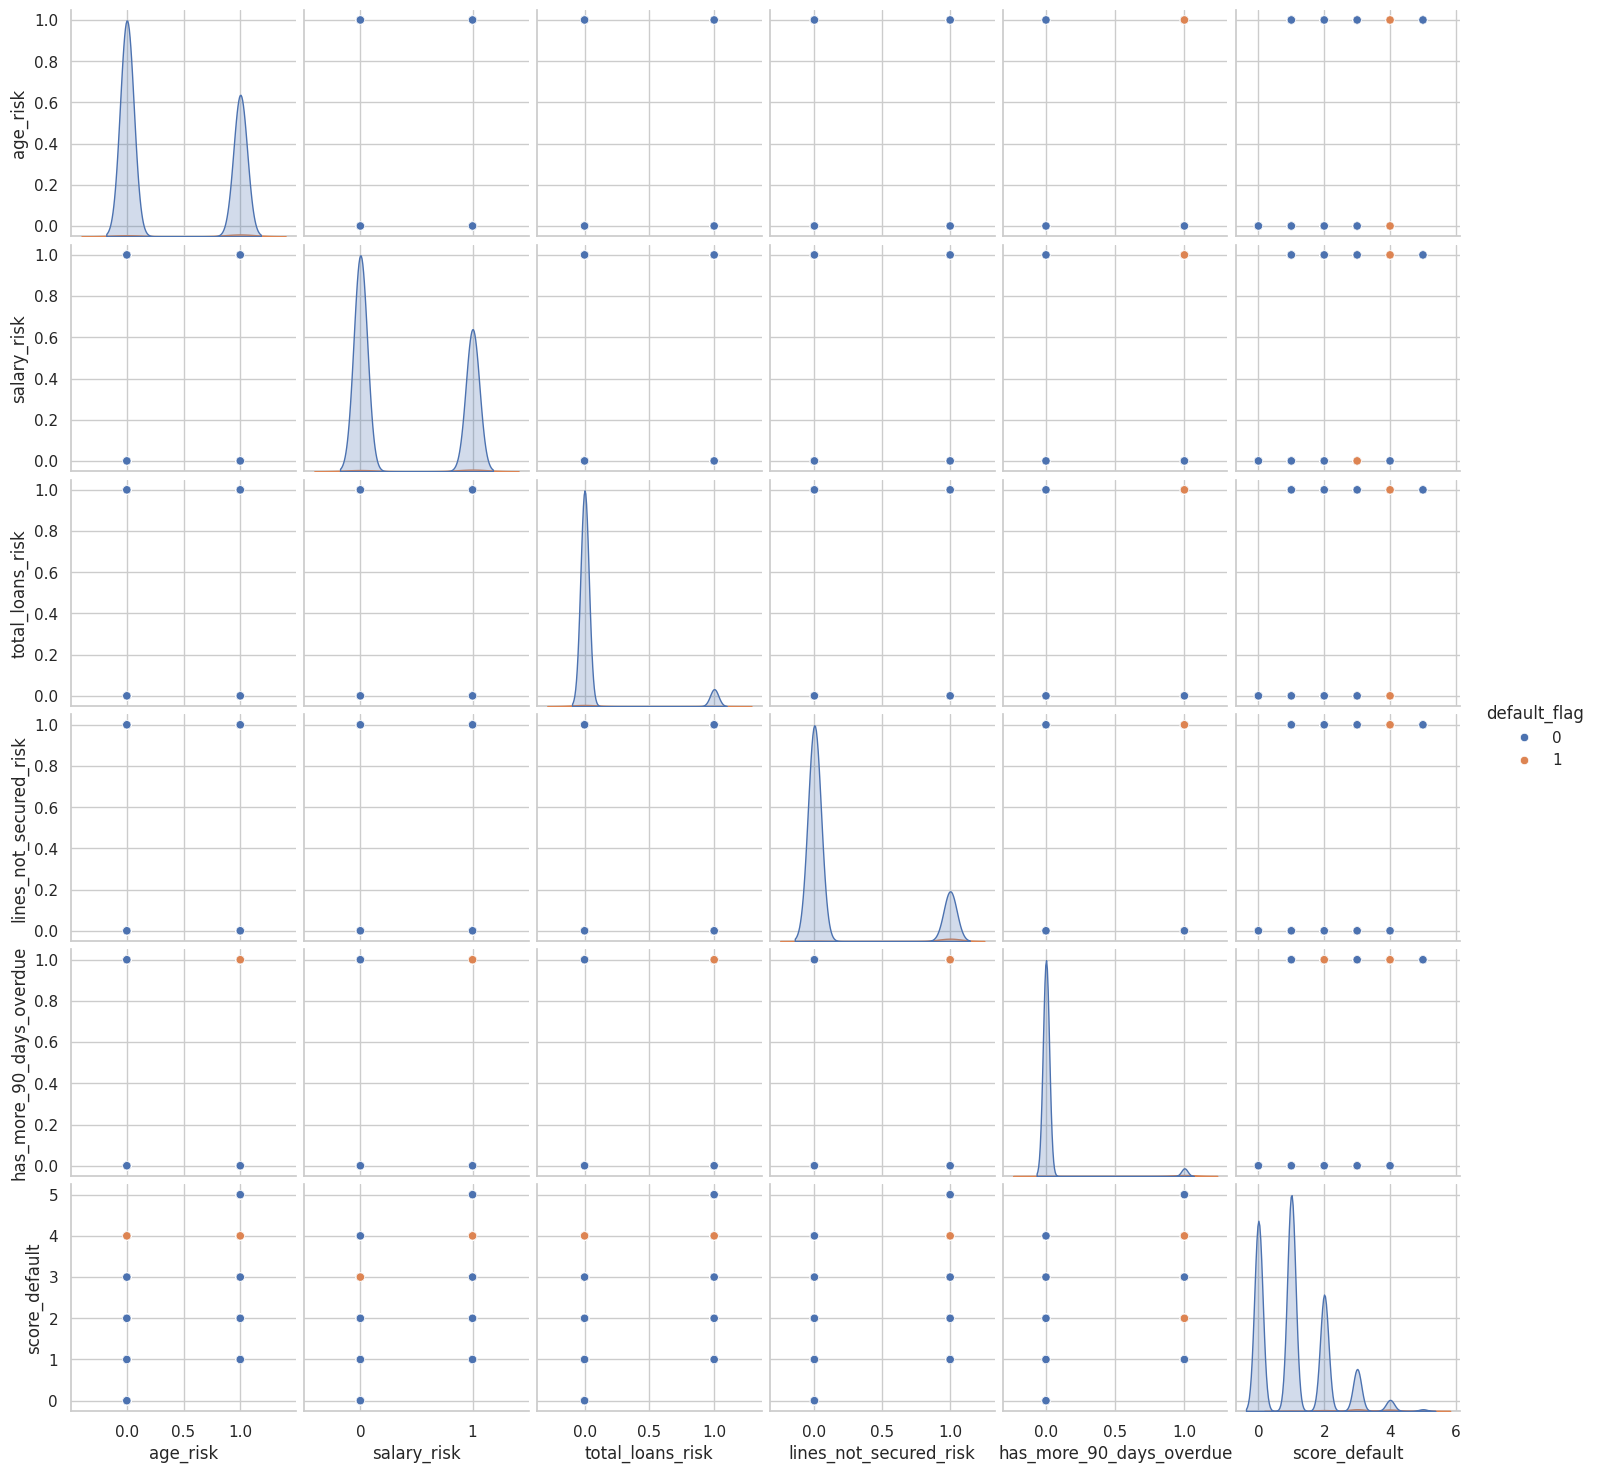

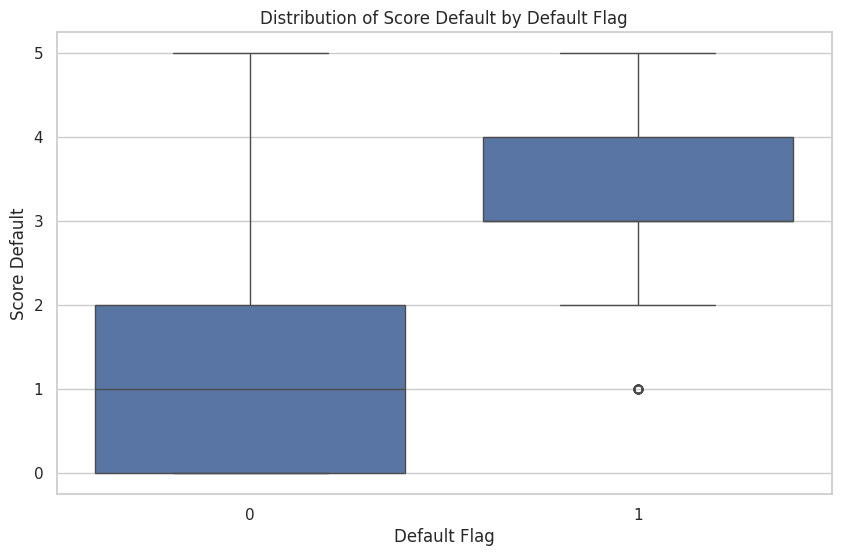

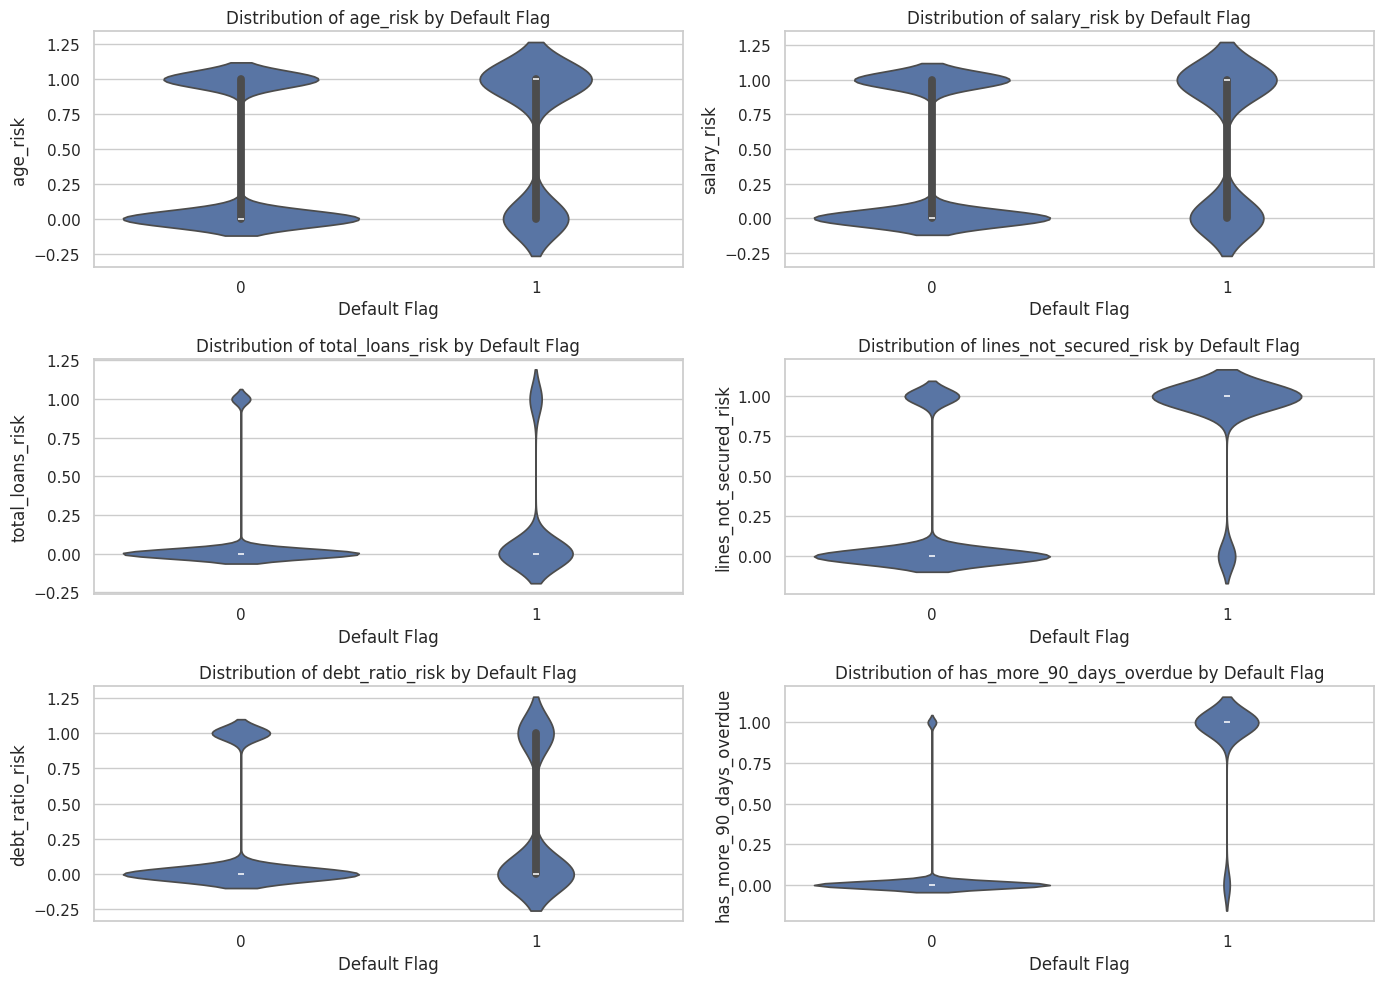

In [ ]:
#Gráficos bivariados

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_curve, roc_auc_score, precision_recall_curve, log_loss
from imblearn.over_sampling import SMOTE

# Dados
df = pd.read_csv('/content/drive/MyDrive/Laboratoria - Projeto 3/users_loans_score.csv')

# Criar a variável score_default
df['score_default'] = df['age_risk'] + df['salary_risk'] + df['total_loans_risk'] + df['lines_not_secured_risk'] + df['has_more_90_days_overdue']

# Configurar o estilo do seaborn
sns.set(style="whitegrid")

# Pairplot para ver a relação entre as variáveis de risco e a pontuação de risco
sns.pairplot(df, hue='default_flag', vars=['age_risk', 'salary_risk', 'total_loans_risk', 'lines_not_secured_risk', 'has_more_90_days_overdue', 'score_default'])
plt.show()

# Boxplot para ver a distribuição de score_default para cada valor de default_flag
plt.figure(figsize=(10, 6))
sns.boxplot(x='default_flag', y='score_default', data=df)
plt.xlabel('Default Flag')
plt.ylabel('Score Default')
plt.title('Distribution of Score Default by Default Flag')
plt.show()

# Violin plot para ver a distribuição das variáveis de risco por default_flag
plt.figure(figsize=(14, 10))
for i, feature in enumerate(['age_risk', 'salary_risk', 'total_loans_risk', 'lines_not_secured_risk', 'debt_ratio_risk', 'has_more_90_days_overdue']):
    plt.subplot(3, 2, i + 1)
    sns.violinplot(x='default_flag', y=feature, data=df)
    plt.xlabel('Default Flag')
    plt.ylabel(feature)
    plt.title(f'Distribution of {feature} by Default Flag')
plt.tight_layout()
plt.show()